In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sms_raw = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

In [16]:
sms_raw.columns = ['Sentence', 'Sentiment']

In [19]:
sms_raw.style.set_properties(subset=['Sentence'], **{'width': '300px'})


,Sentence,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [18]:
sms_raw['Sentence']

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
5      I have to jiggle the plug to get it to line up...
6      If you have several dozen or several hundred c...
7            If you are Razr owner...you must have this!
8                    Needless to say, I wasted my money.
9                       What a waste of money and time!.
10                       And the sound quality is great.
11     He was very impressed when going from the orig...
12     If the two were seperated by a mere 5+ ft I st...
13                              Very good quality though
14     The design is very odd, as the ear "clip" is n...
15     Highly recommend for any one who has a blue to...
16                   I advise EVERYONE DO NOT BE FOOLED!
17                             

In [20]:
negative = ['wasted', 'waste', 'hate', 'fooled', 'misleading', 'unusable', 'poor', 'disappointed', 'disappoint', 'breaks', 
            'junk', 'lousy', 'problem', "don't", 'difficult', 'horrible', 'broken', 'fail', "doesn't", 'terrible']

In [22]:
for word in negative:
    sms_raw[str(word)] = sms_raw.Sentence.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )

In [23]:
sms_raw.head()

,Sentence,Sentiment,wasted,waste,hate,fooled,misleading,unusable,poor,disappointed,...,junk,lousy,problem,don't,difficult,horrible,broken,fail,doesn't,terrible
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
sms_raw['Sentiment'] = (sms_raw['Sentiment'] == 0)

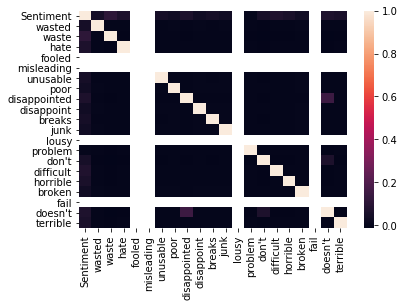

In [25]:
sns.heatmap(sms_raw.corr())

In [26]:
data = sms_raw[negative]
target = sms_raw['Sentiment']

In [27]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 447


## Test on other datasets

In [39]:
# IMDB

In [28]:
sms_raw2 = pd.read_csv('imdb_labelled.txt', sep='\t', header = None)

In [30]:
sms_raw2.columns = ['Sentence', 'Sentiment']

In [32]:
sms_raw2.style.set_properties(subset=['Sentence'], **{'width': '300px'})

,Sentence,Sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0
6,Wasted two hours.,0
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the science teacher.,1


In [33]:
negative = ['wasted', 'waste', 'hate', 'fooled', 'misleading', 'unusable', 'poor', 'disappointed', 'disappoint', 'breaks', 
            'junk', 'lousy', 'problem', "don't", 'difficult', 'horrible', 'broken', 'fail', "doesn't", 'terrible']

In [34]:
for word in negative:
    sms_raw2[str(word)] = sms_raw2.Sentence.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )

In [35]:
sms_raw2['Sentiment'] = (sms_raw2['Sentiment'] == 0)

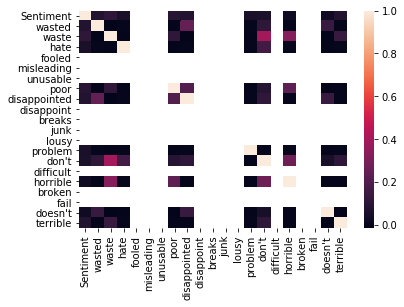

In [36]:
sns.heatmap(sms_raw2.corr())

In [37]:
data = sms_raw2[negative]
target = sms_raw2['Sentiment']

In [38]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 332


In [40]:
# Yelp

In [41]:
sms_raw3 = pd.read_csv('yelp_labelled.txt', sep='\t', header = None)

In [42]:
sms_raw3.columns = ['Sentence', 'Sentiment']

In [43]:
negative = ['wasted', 'waste', 'hate', 'fooled', 'misleading', 'unusable', 'poor', 'disappointed', 'disappoint', 'breaks', 
            'junk', 'lousy', 'problem', "don't", 'difficult', 'horrible', 'broken', 'fail', "doesn't", 'terrible']

In [44]:
for word in negative:
    sms_raw3[str(word)] = sms_raw3.Sentence.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )

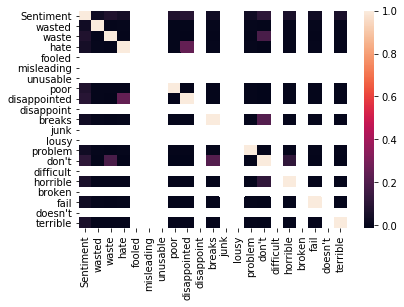

In [45]:
sms_raw3['Sentiment'] = (sms_raw3['Sentiment'] == 0)

data = sms_raw3[negative]
target = sms_raw3['Sentiment']

sns.heatmap(sms_raw3.corr())

In [46]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 459
